In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import acquire_exoplanet_data as aed
from wrangle import initial_clean
from wrangle import splitter
import explore

from sklearn.cluster import KMeans
import scipy.stats as stats

## For this I will begin with the cleaned up df, no nulls.  I will not remove outliers, since I want to get their impact considering I have cut the dataset down so strongly and because outliers might actaully be very enlightening in a field that is constantly making new discoveries and changing paradigms.

In [2]:
df = aed()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32552 entries, 0 to 32551
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hostname         32552 non-null  object 
 1   pl_letter        32552 non-null  object 
 2   sy_snum          32552 non-null  int64  
 3   sy_pnum          32552 non-null  int64  
 4   cb_flag          32552 non-null  int64  
 5   discoverymethod  32552 non-null  object 
 6   disc_year        32552 non-null  int64  
 7   glat             32552 non-null  float64
 8   glon             32552 non-null  float64
 9   pl_orbper        29747 non-null  float64
 10  sy_gaiamag       31884 non-null  float64
 11  pl_controv_flag  32552 non-null  int64  
 12  pl_dens          1626 non-null   float64
 13  pl_rade          22711 non-null  float64
 14  pl_ratdor        15519 non-null  float64
 15  pl_masse         2781 non-null   float64
 16  st_teff          30688 non-null  float64
 17  st_met      

,hostname,pl_letter,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,glat,glon,pl_orbper,...,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate
0,Kepler-11,c,1,6,0,Transit,2010,8.13328,76.16130,13.025020,...,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16
1,Kepler-11,f,1,6,0,Transit,2010,8.13328,76.16130,46.688760,...,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16
2,OGLE-TR-10,b,1,1,0,Transit,2004,-1.57666,359.85149,3.101278,...,5950.0,NaN,0.188,NaN,NaN,1.14,NaN,1.17,1344.9700,2014-05-14
3,HD 210702,b,1,1,0,Radial Velocity,2007,-32.02111,76.29345,354.290000,...,NaN,NaN,NaN,NaN,NaN,1.85,NaN,NaN,54.1963,2018-12-03
4,BD-08 2823,b,1,2,0,Radial Velocity,2009,34.75486,248.49513,5.600000,...,4746.0,-0.07,NaN,4.13,4.5,0.74,NaN,NaN,41.3342,2018-04-25


In [3]:
df = initial_clean(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2820 entries, 14 Her-b to ups And-d
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_planets_in_sys        2820 non-null   int64  
 1   orbital_period            2820 non-null   float64
 2   y                         2820 non-null   object 
 3   star_temp                 2820 non-null   float64
 4   metallicity               2820 non-null   float64
 5   luminosity                2820 non-null   float64
 6   star_age                  2820 non-null   float64
 7   star_mass                 2820 non-null   float64
 8   star_density              2820 non-null   float64
 9   star_radius               2820 non-null   float64
 10  star_distance_from_earth  2820 non-null   float64
 11  multistar                 2820 non-null   int64  
 12  discovery_order           2820 non-null   int64  
 13  y_encoded                 2820 non-null   int64  
dtypes

,num_planets_in_sys,orbital_period,y,star_temp,metallicity,luminosity,star_age,star_mass,star_density,star_radius,star_distance_from_earth,multistar,discovery_order,y_encoded
planet,,,,,,,,,,,,,,
14 Her-b,2,1766.601670,Not-Earthlike,5296.985000,0.415000,-0.1515,3.90,0.930000,1.2739,0.976667,17.9323,0,1,0
51 Peg-b,1,4.230530,Not-Earthlike,5763.920000,0.195333,0.1360,10.00,1.046667,0.8937,1.220000,15.4614,0,1,0
55 Cnc-b,5,14.632669,Not-Earthlike,5241.412857,0.329125,-0.1970,5.25,0.918000,1.4185,0.956667,12.5855,1,1,0
55 Cnc-d,5,5000.560000,Not-Earthlike,5248.315000,0.343286,-0.1970,5.50,0.925556,1.4185,0.956667,12.5855,1,3,0
BD+20 594-b,1,41.686548,Not-Earthlike,5745.000000,-0.120000,-0.0560,3.34,1.196667,1.7950,0.990000,179.4610,0,1,0


## Time to split!

In [4]:
train, validate, test = splitter(df)

Train = 1579 rows (56.0%) | Validate = 677 rows (24.0%) | Test = 564 rows (20.0%)
You did not stratify.  If looking to stratify, ensure to add argument: "target = variable to stratify on".


# *Bivariate* then clustering, wanna see some shit.  Do some hypothesis testing!

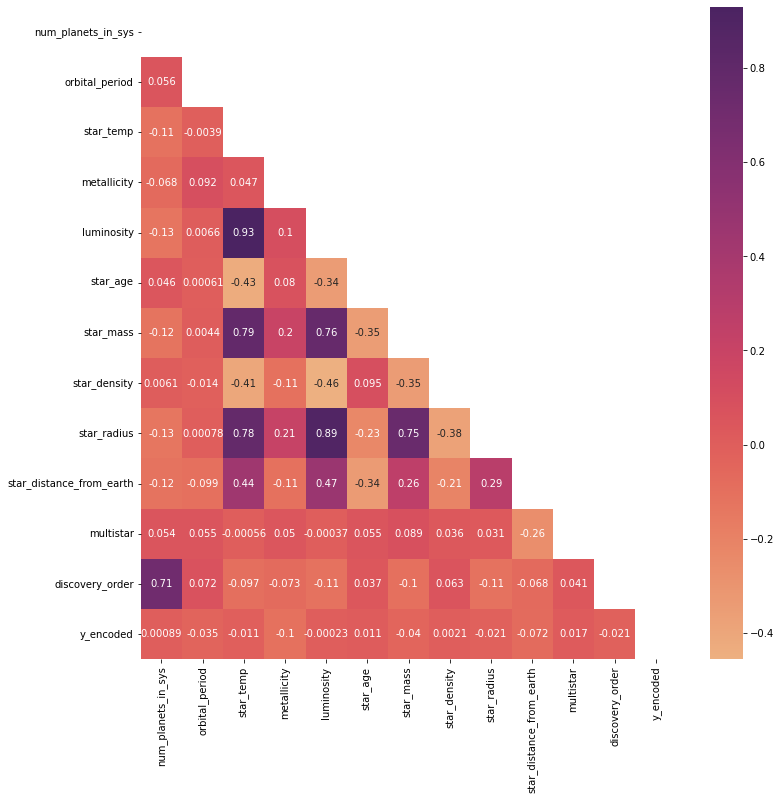

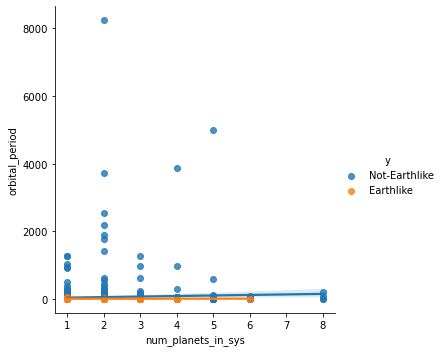

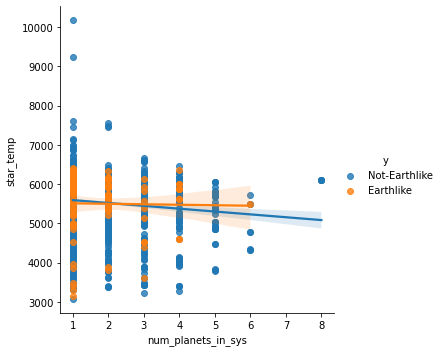

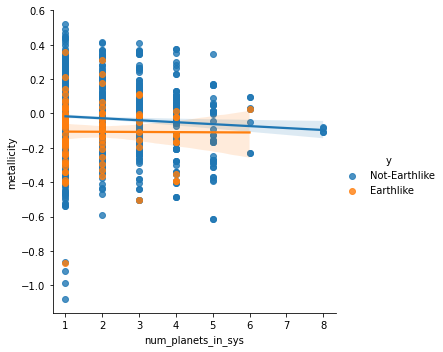

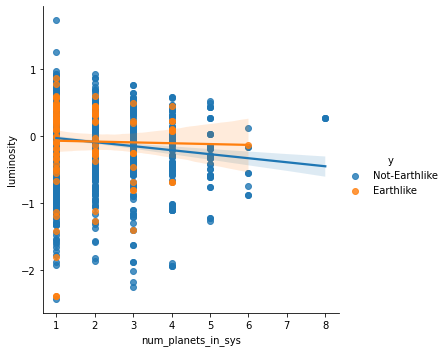

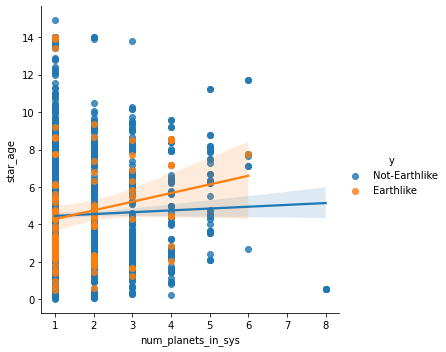

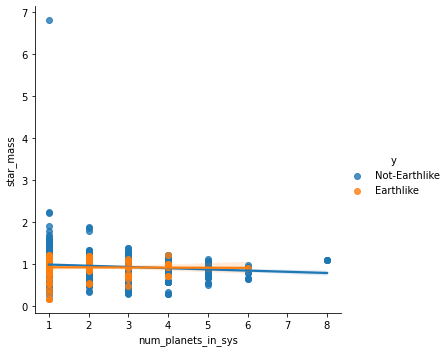

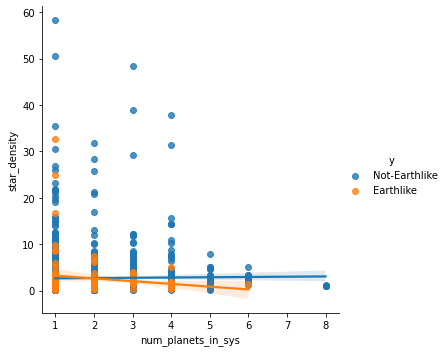

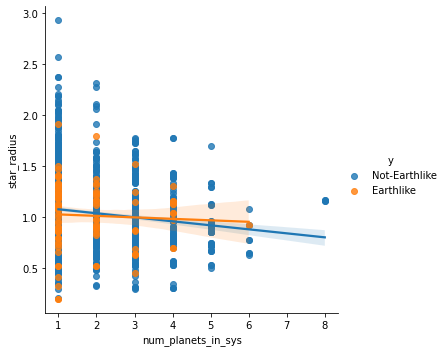

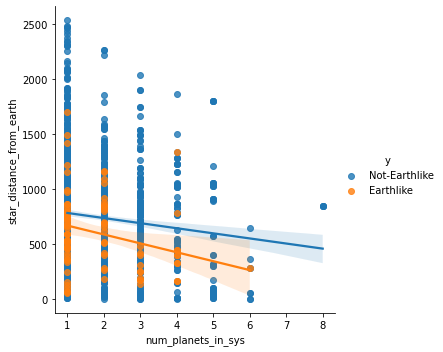

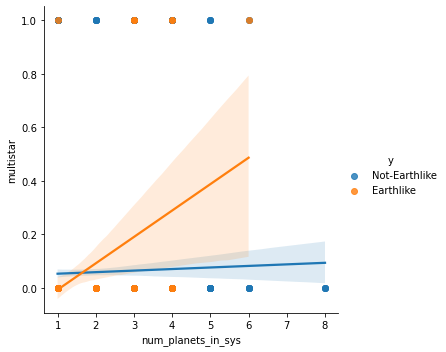

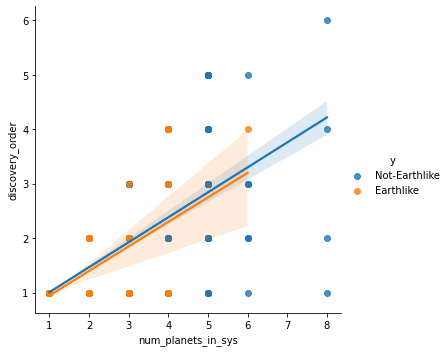

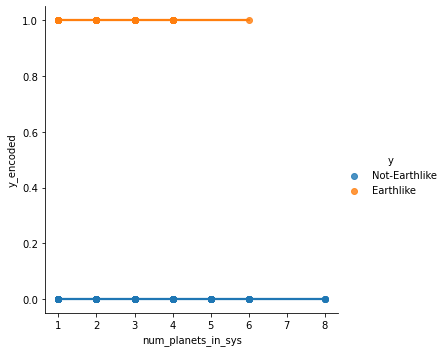

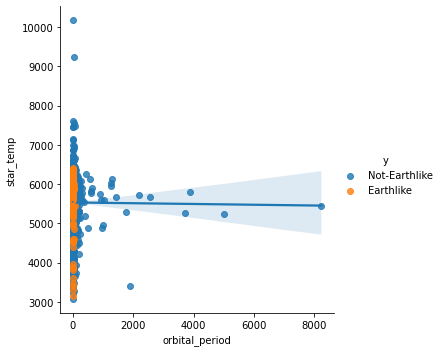

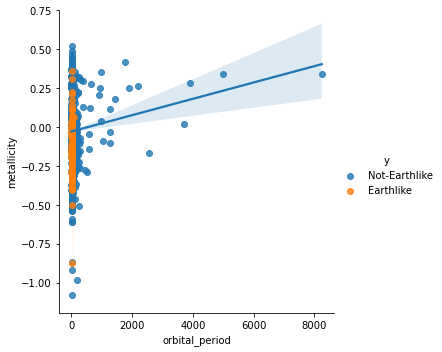

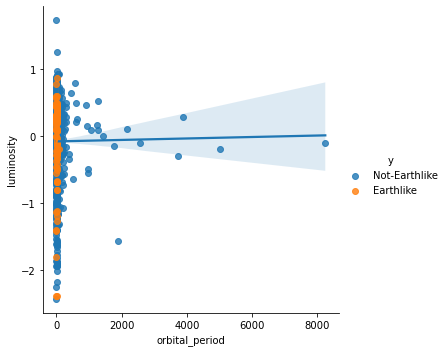

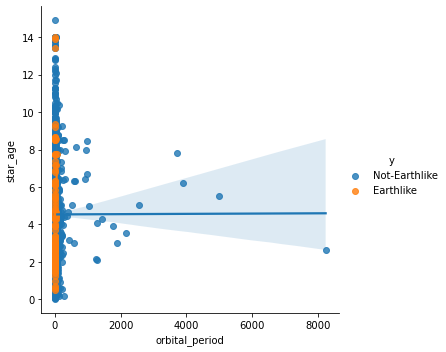

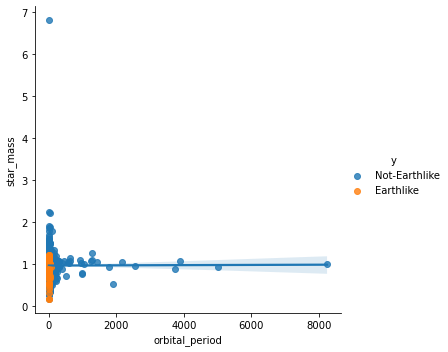

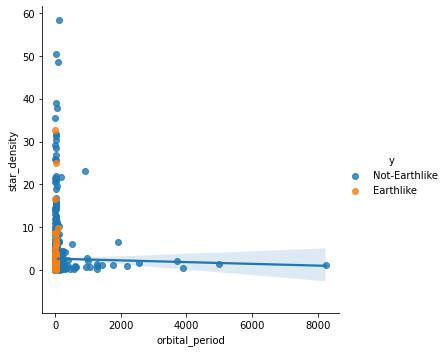

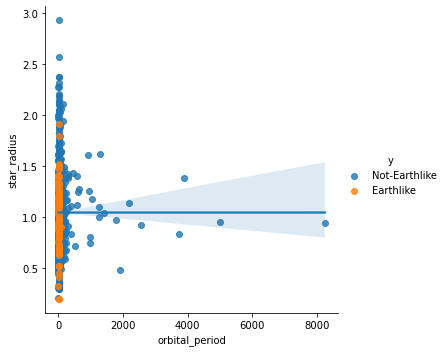

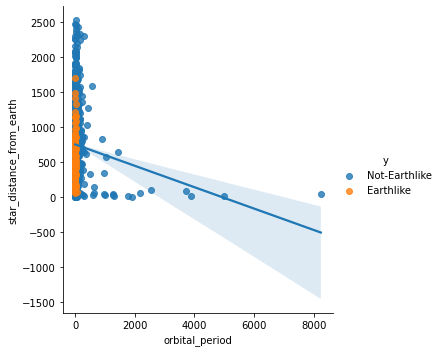

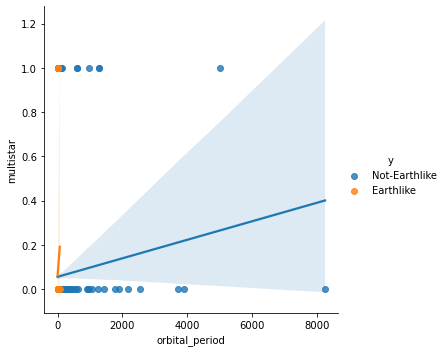

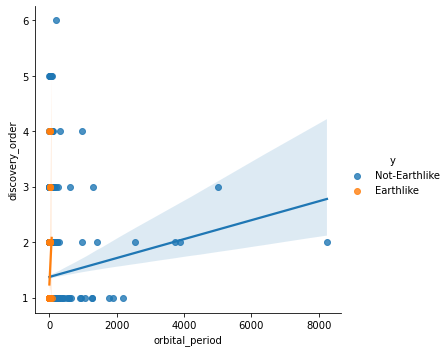

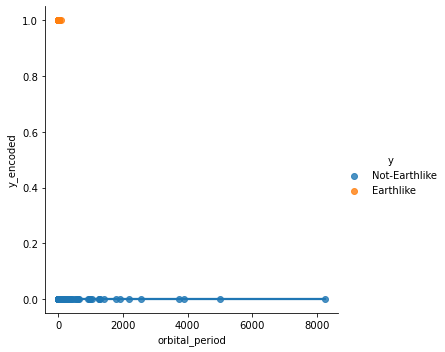

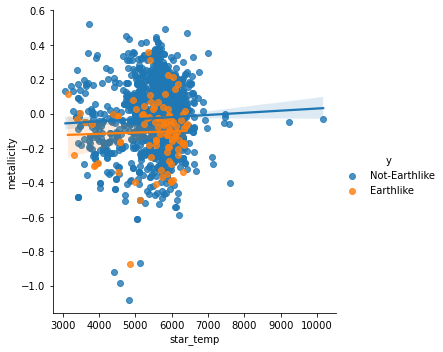

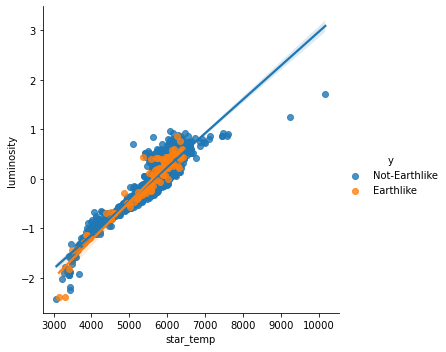

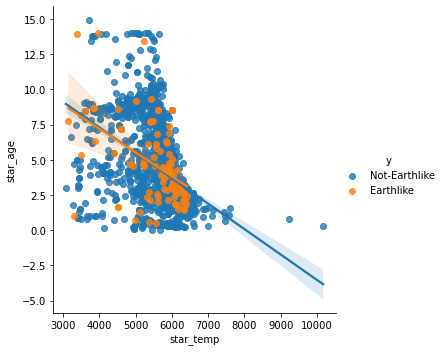

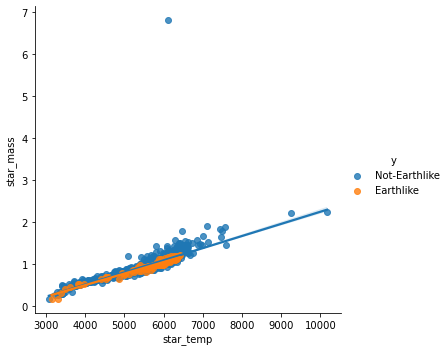

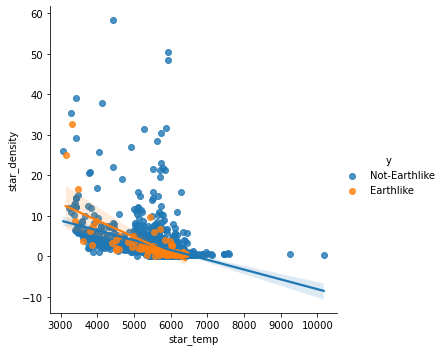

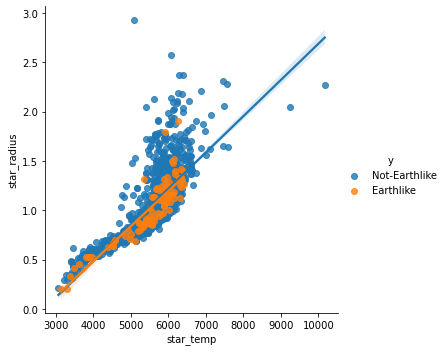

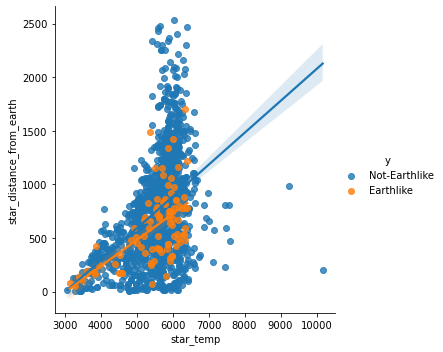

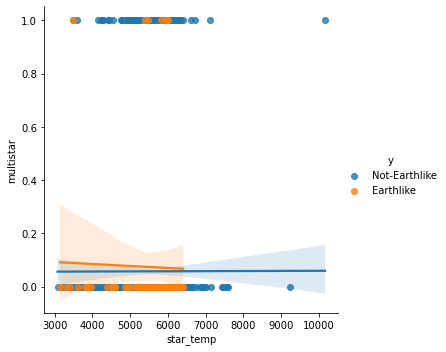

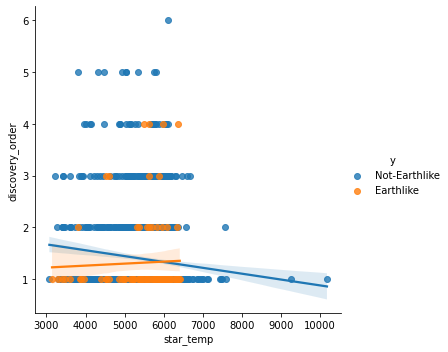

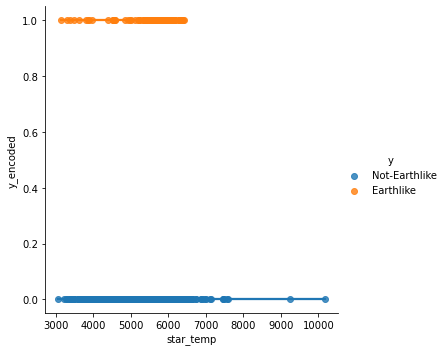

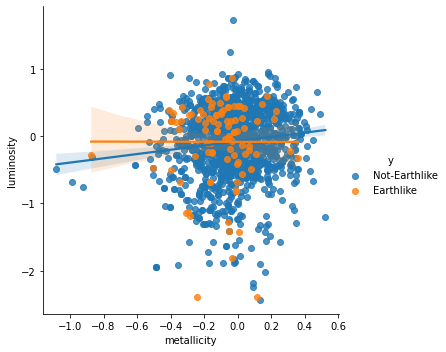

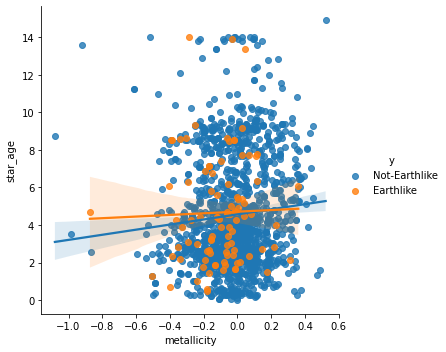

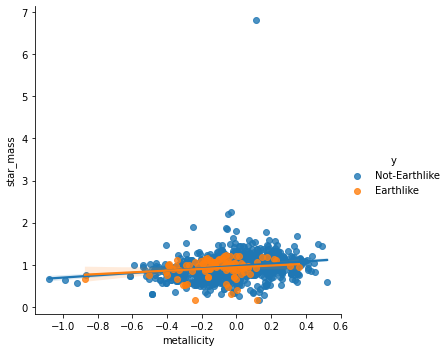

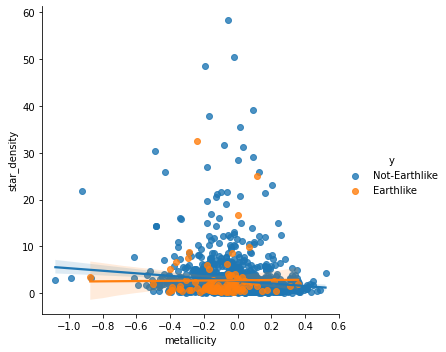

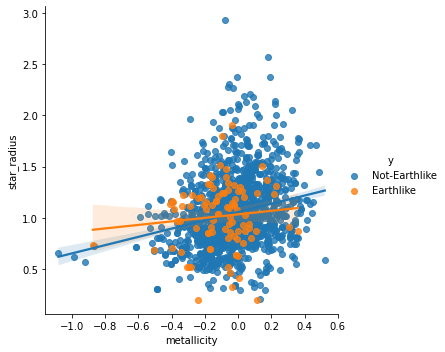

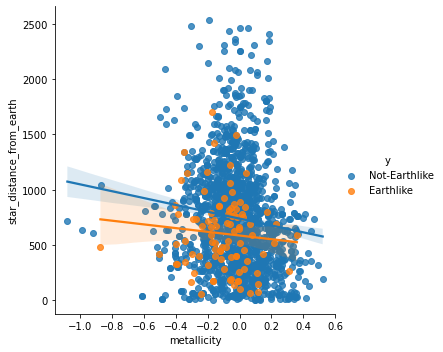

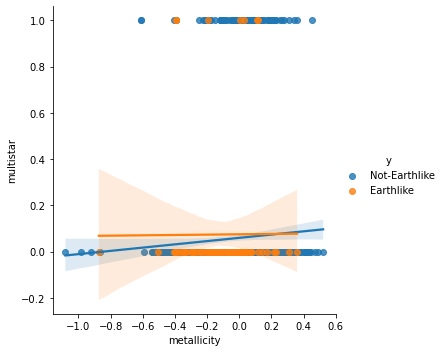

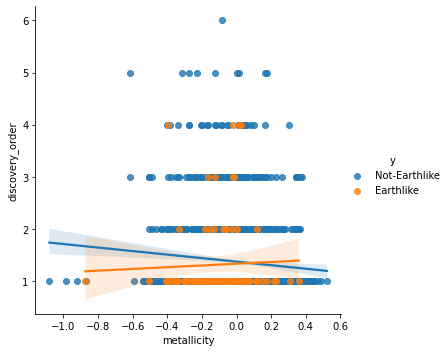

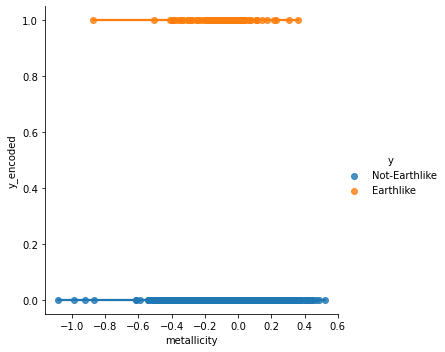

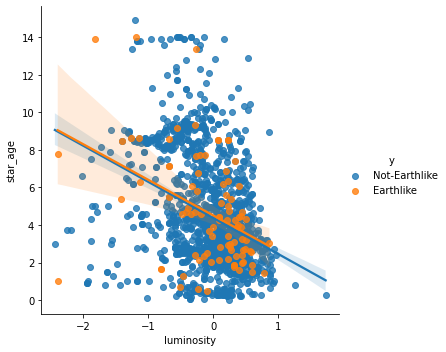

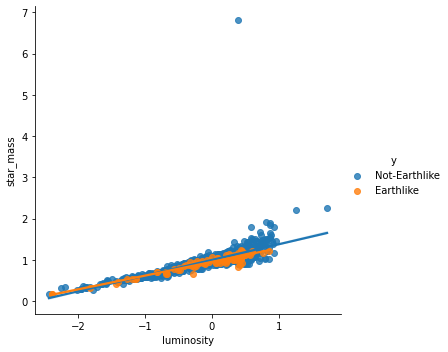

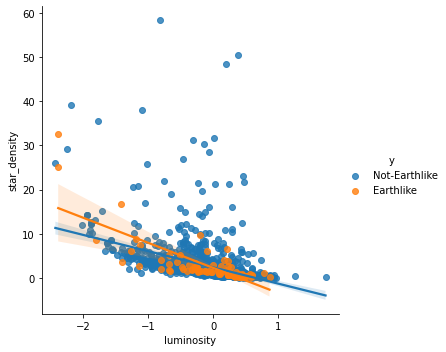

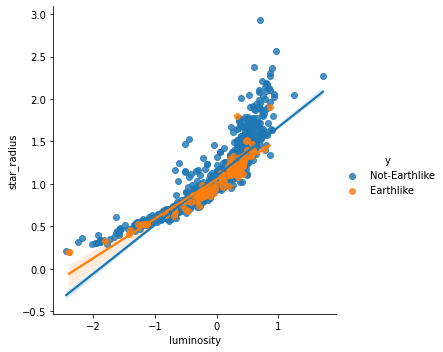

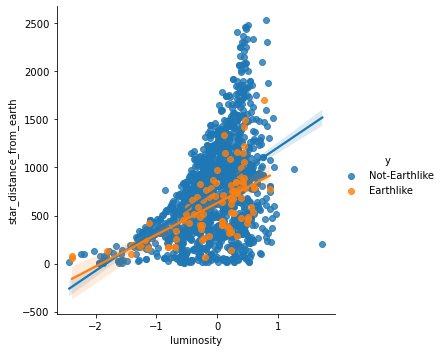

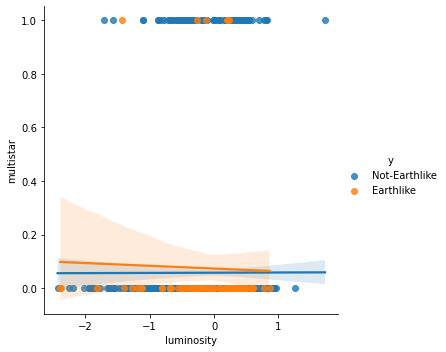

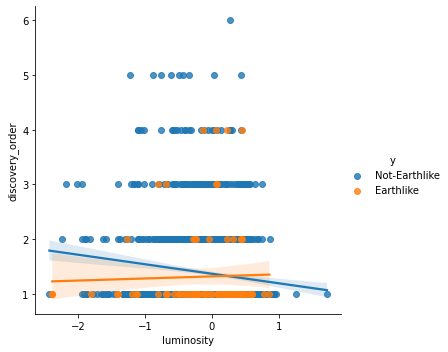

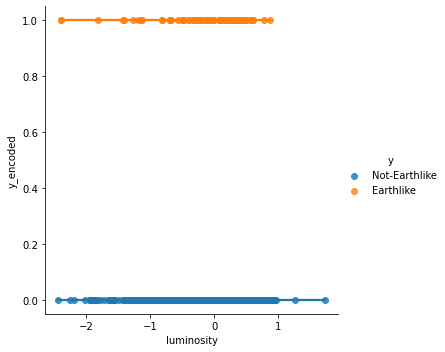

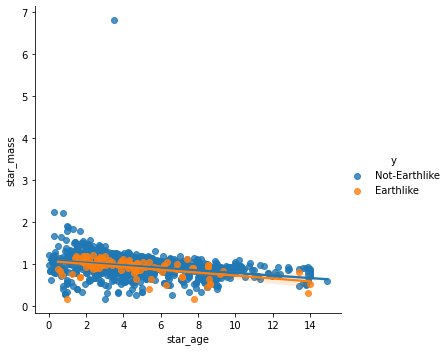

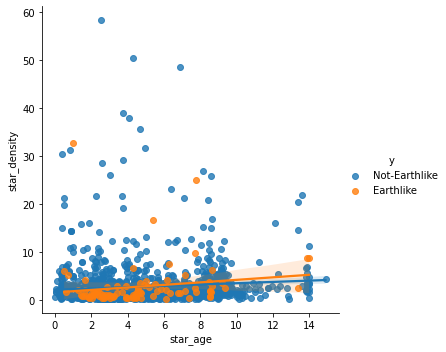

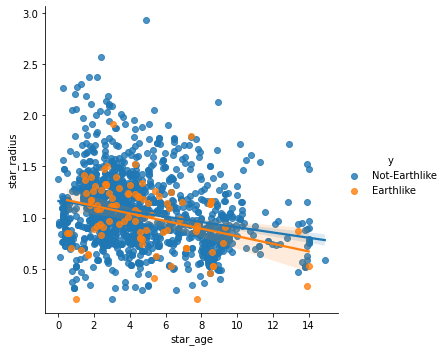

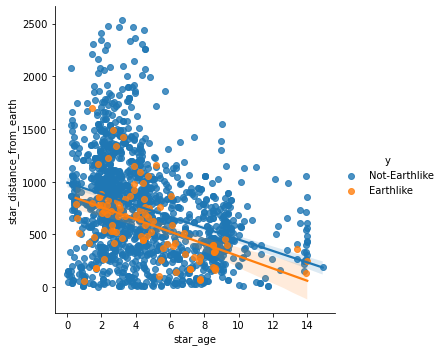

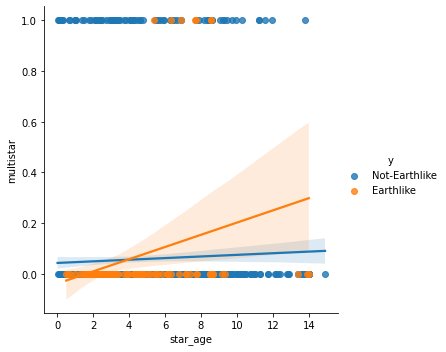

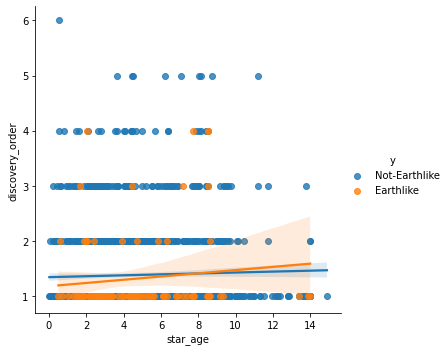

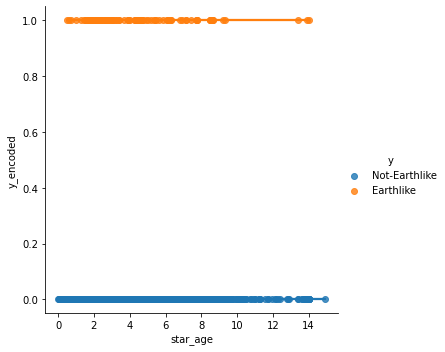

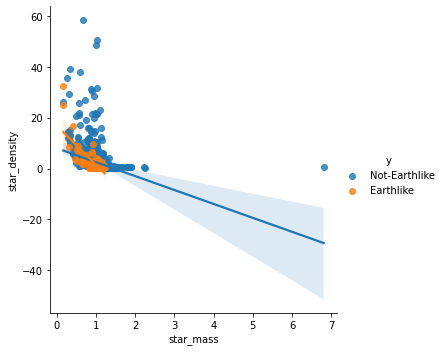

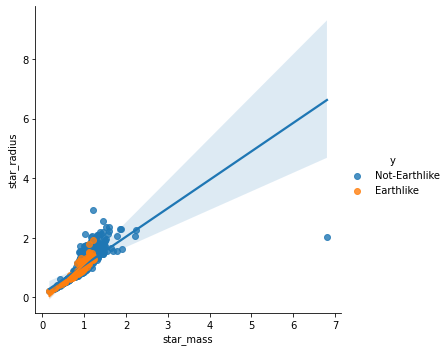

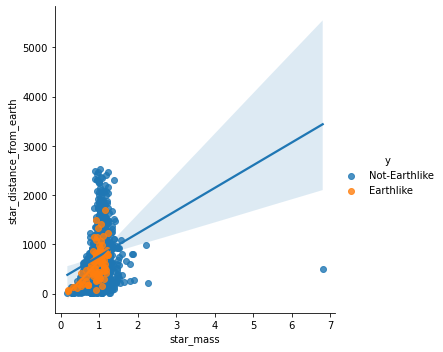

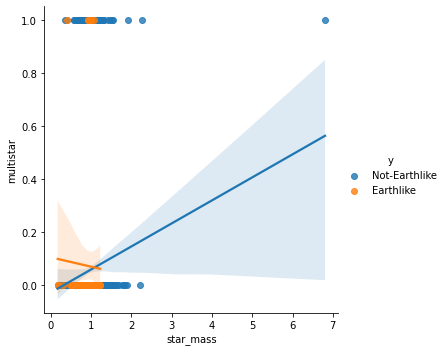

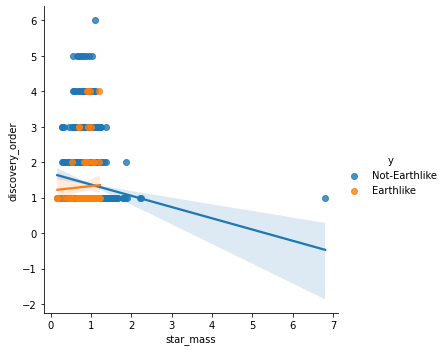

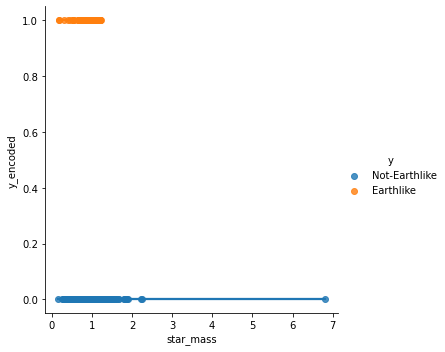

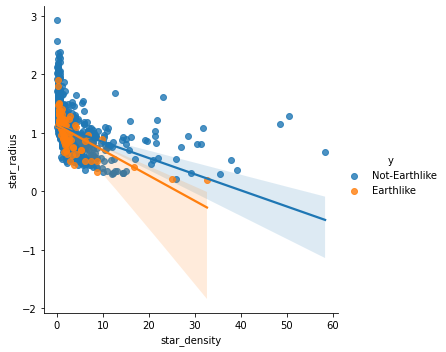

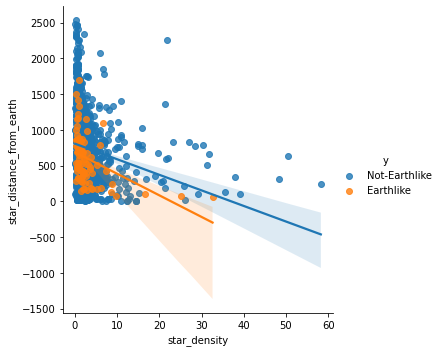

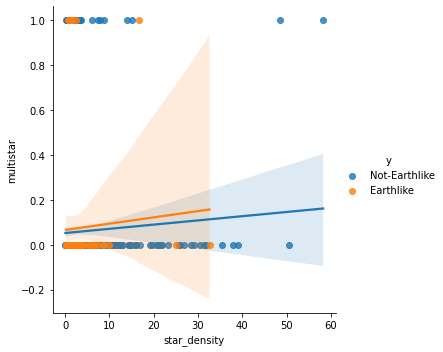

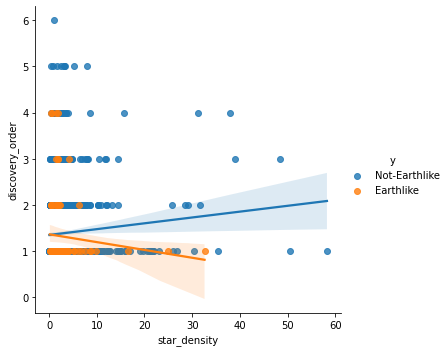

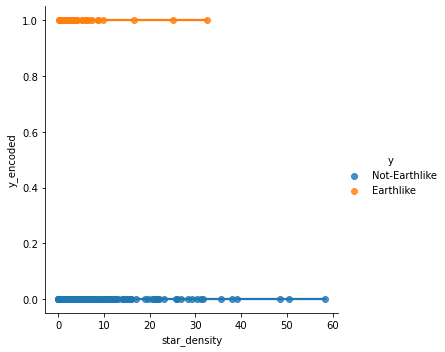

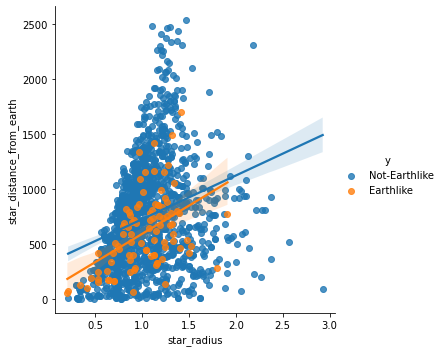

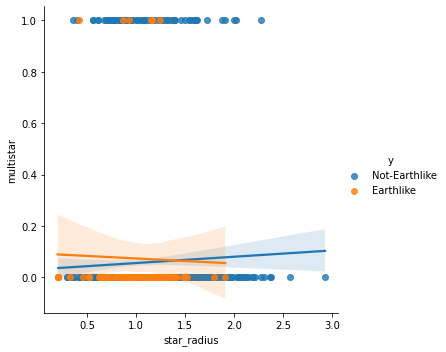

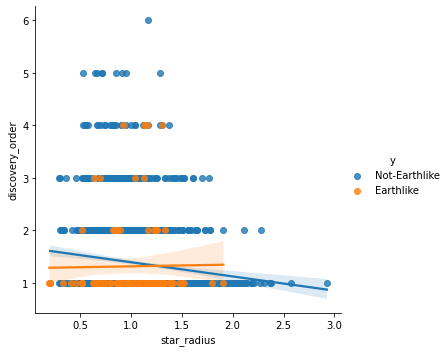

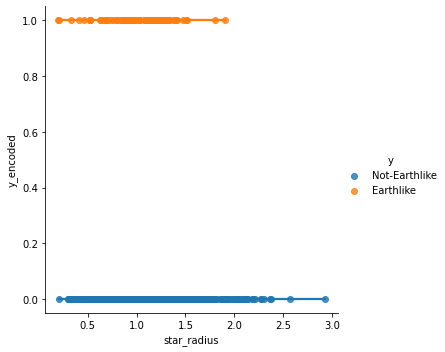

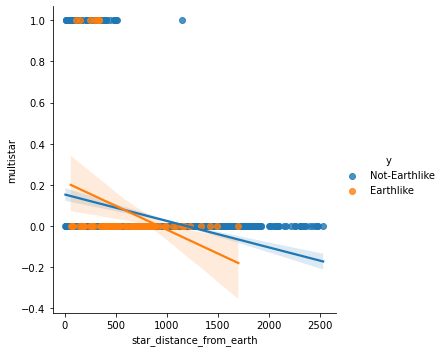

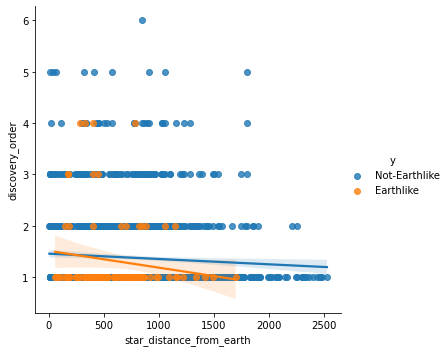

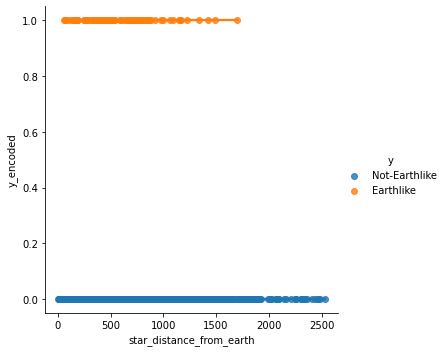

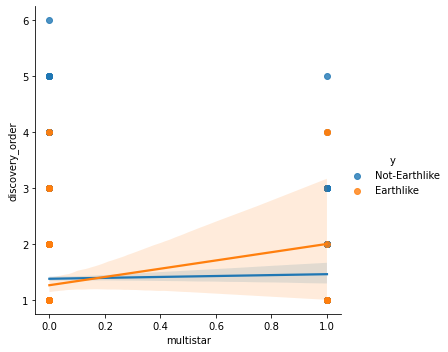

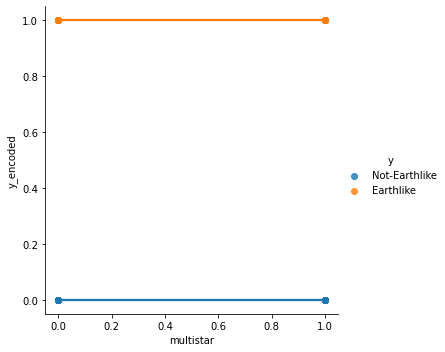

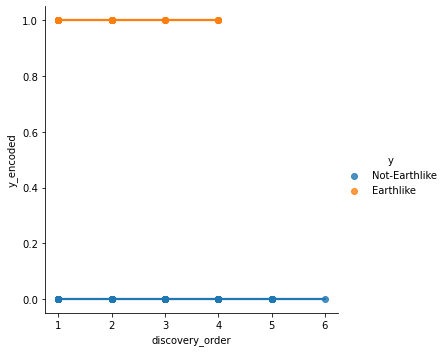

In [5]:
explore.plot_variable_pairs(train)

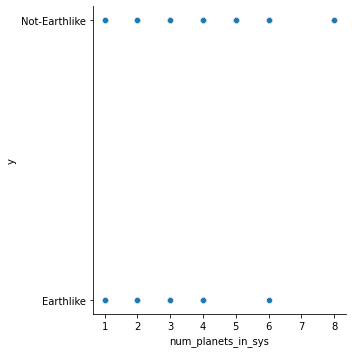

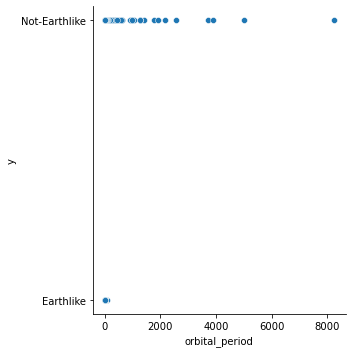

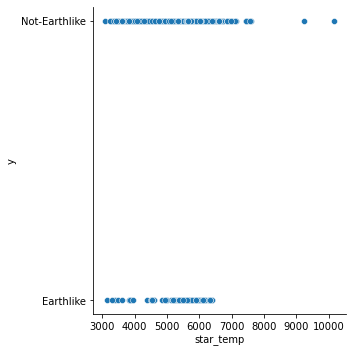

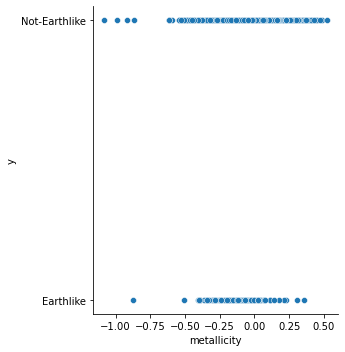

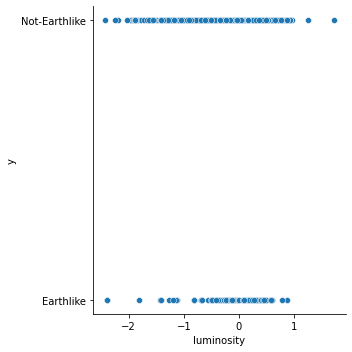

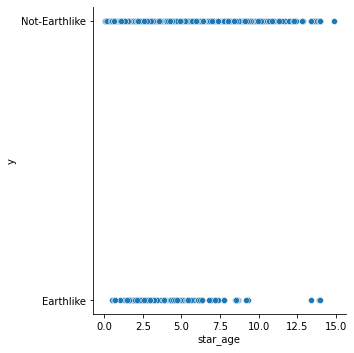

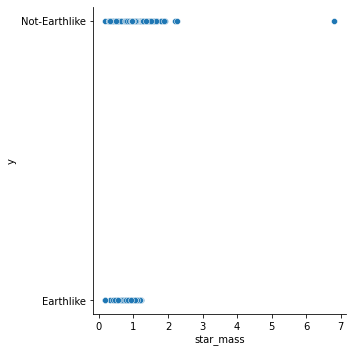

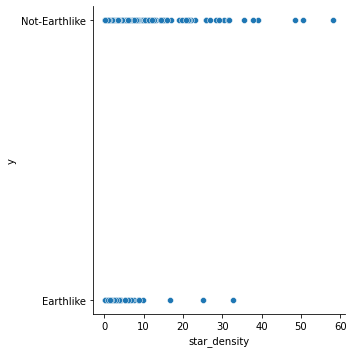

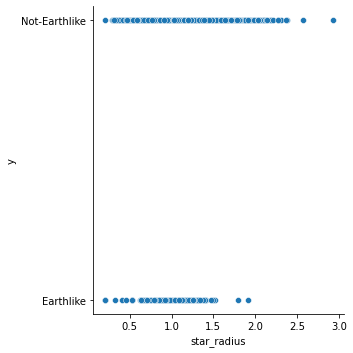

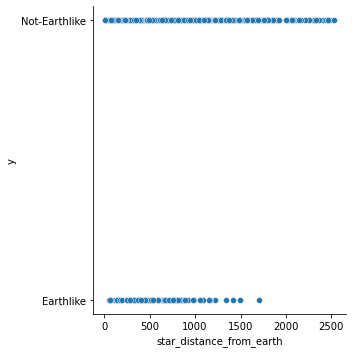

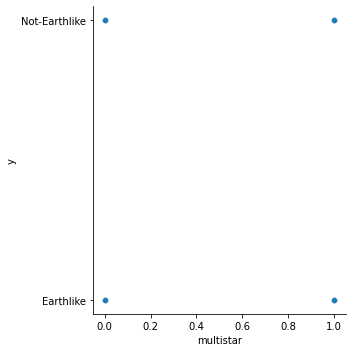

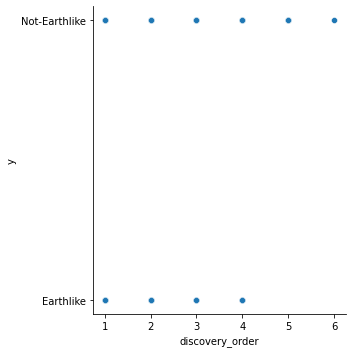

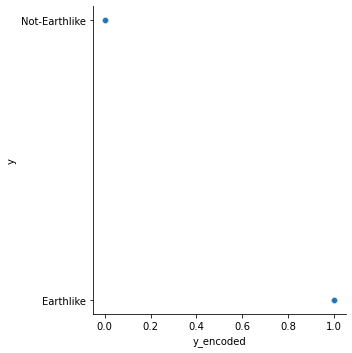

In [6]:
explore.plot_numerical_against_target(train,'y')

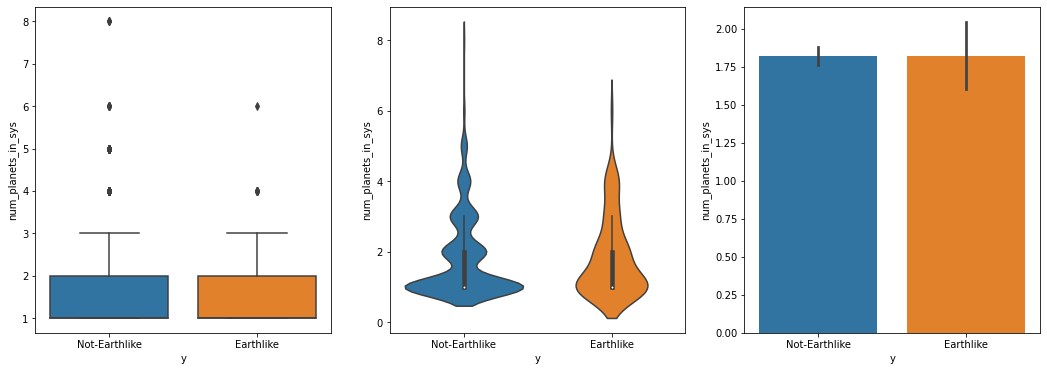

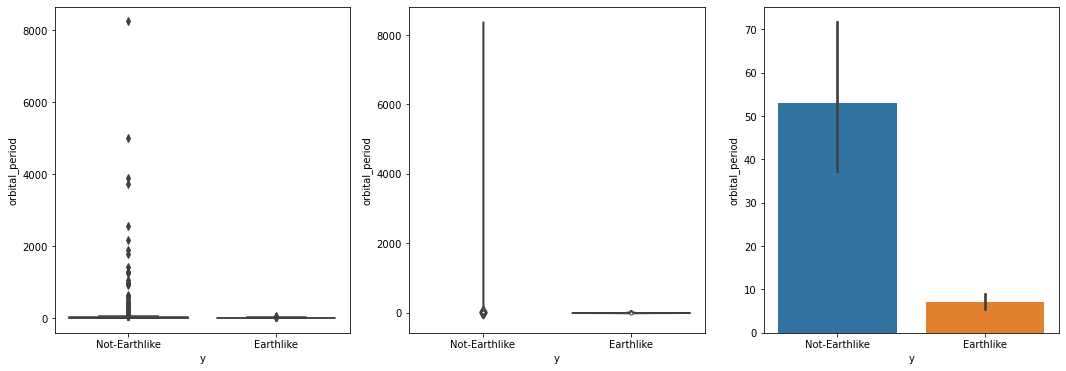

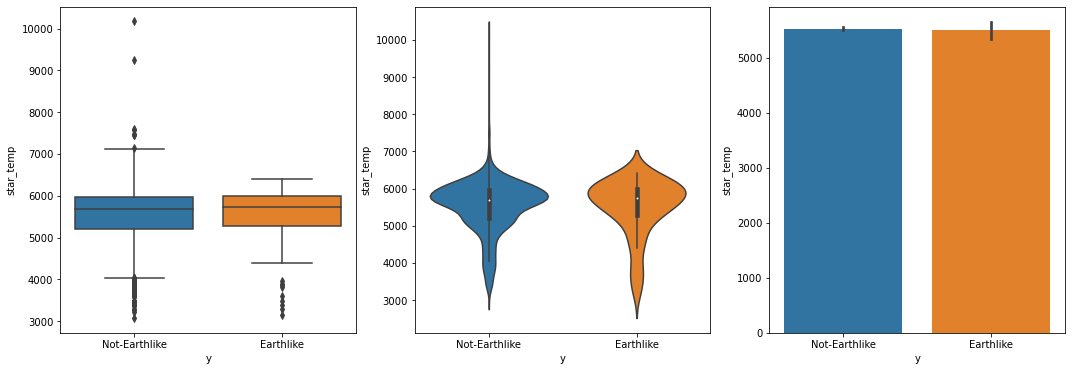

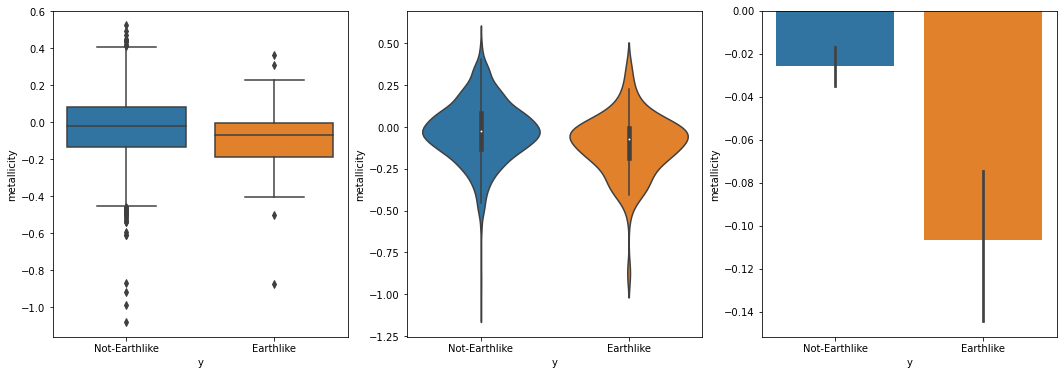

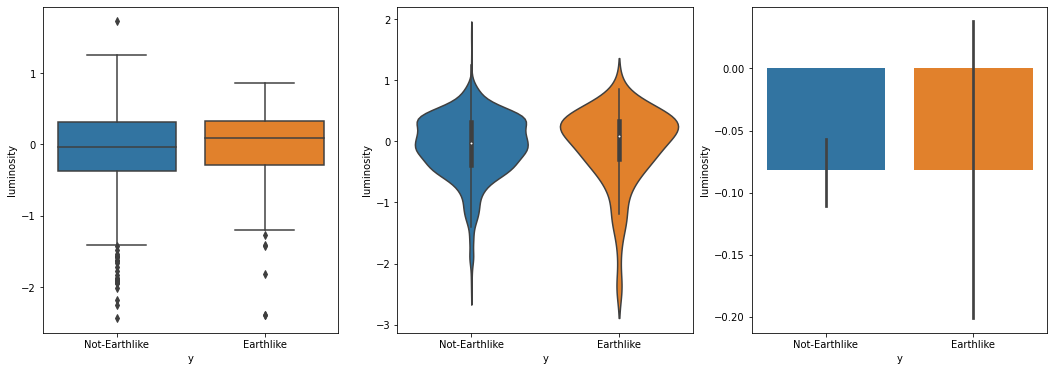

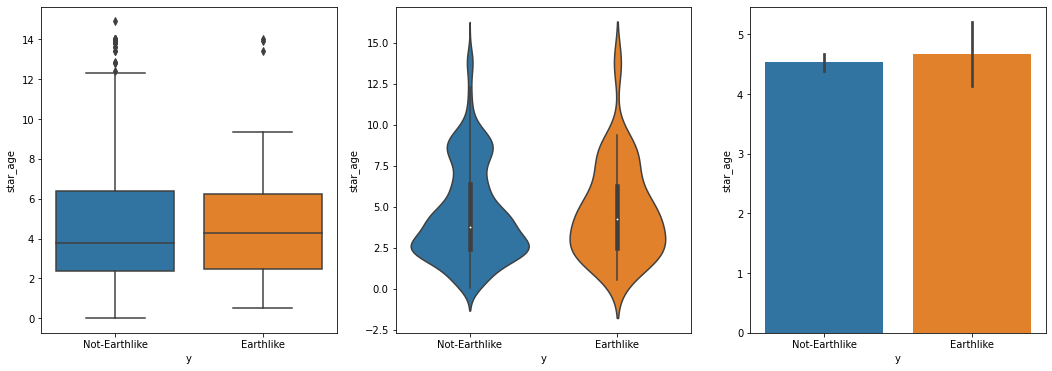

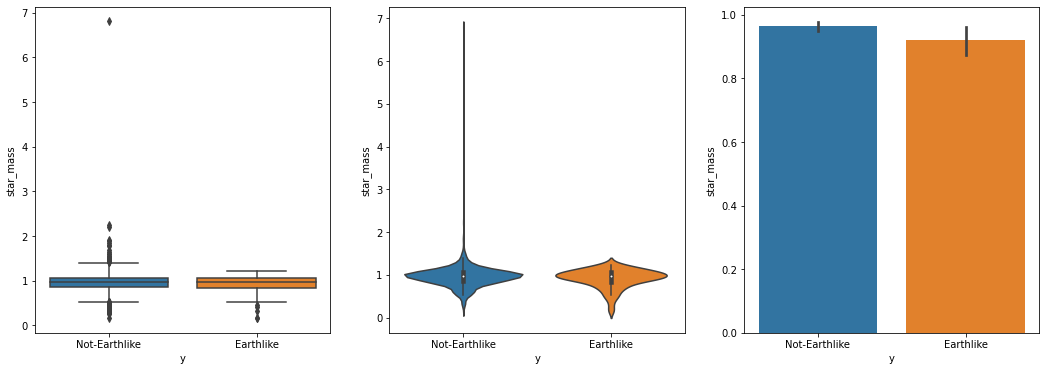

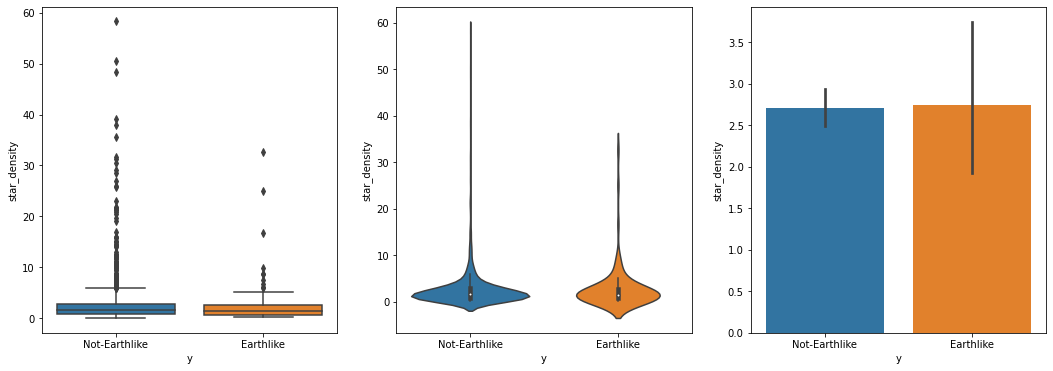

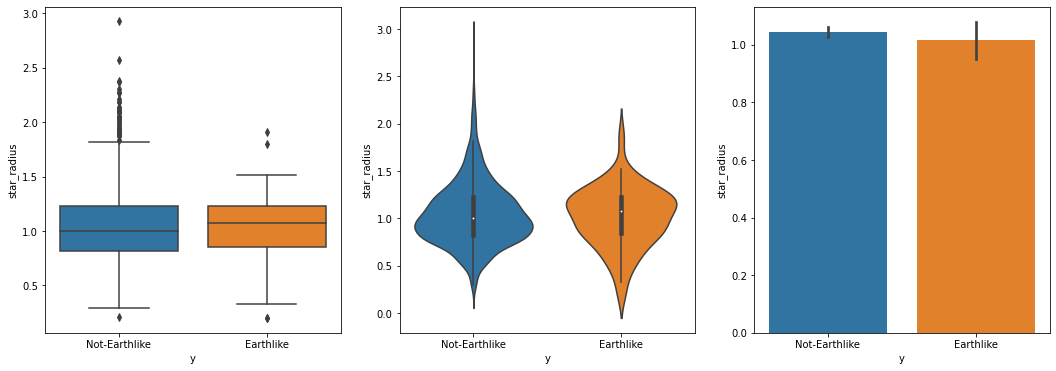

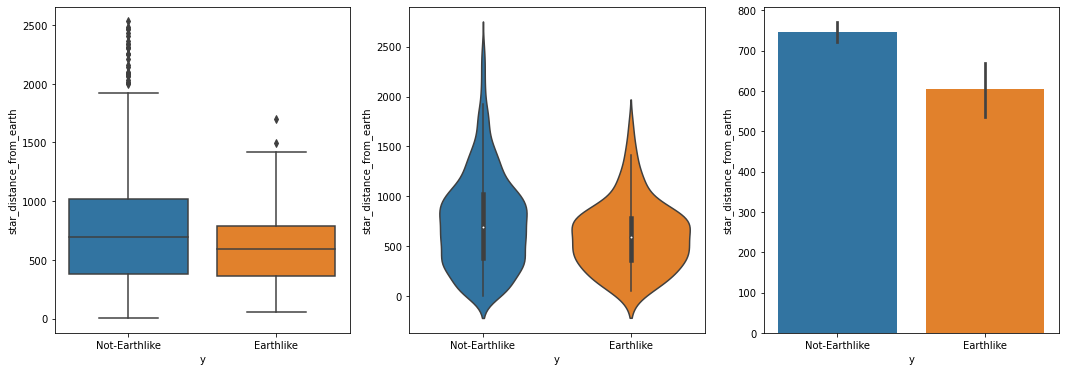

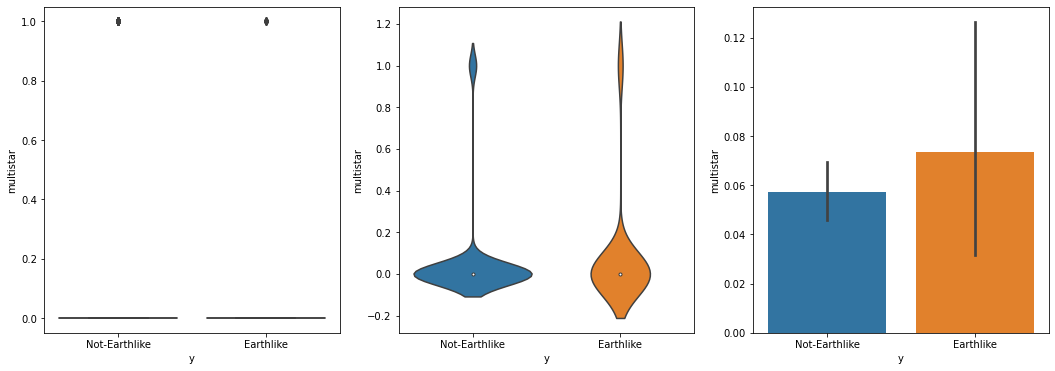

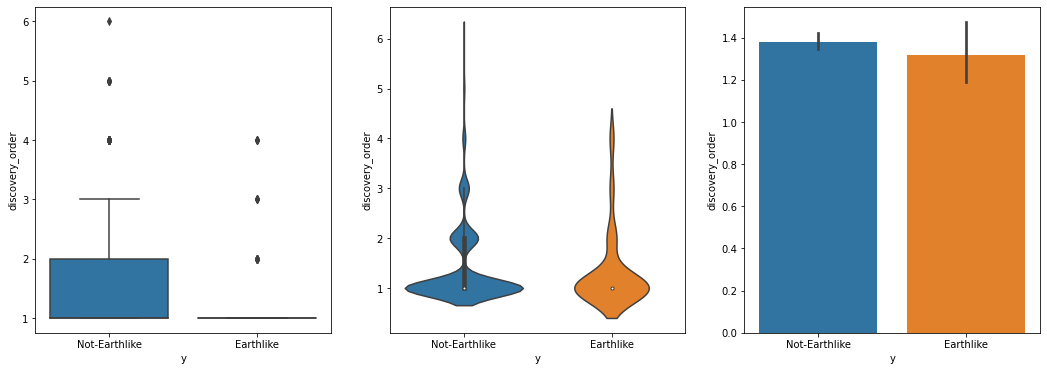

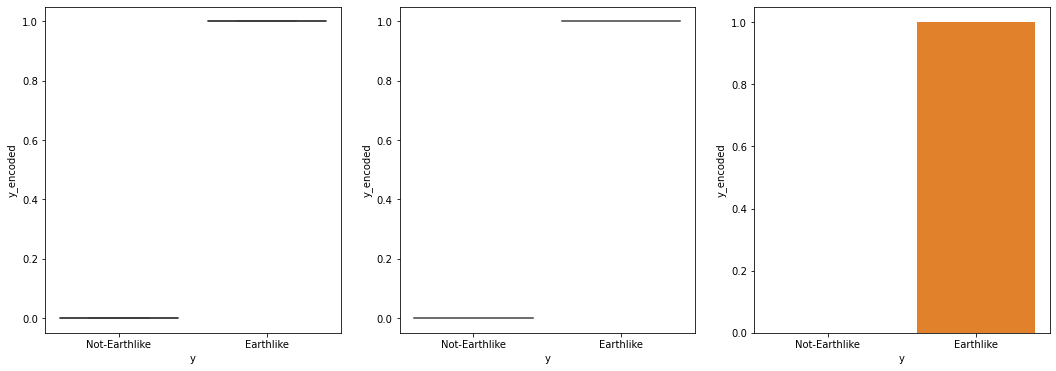

In [7]:
explore.plot_categorical_and_continuous_vars(train)

## CLUSTERING TIME FINALLY!!

Which pairs of things should I cluster.  Hmmm.  Let's go with:
- 

In [ ]:
X = train[['star_age','star_mass','star_density','star_radius(vs_sun)','luminosity','metallicity','star_temp']]
X

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
train

In [ ]:
sns.scatterplot(data=train, x='star_temp',y='star_density',hue='cluster')

In [ ]:
sns.scatterplot(data=train, x='star_temp',y='luminosity',hue='cluster')

In [ ]:
df[df.y=='Earthlike'].sort_values(by='orbital_period')

### 1) Run t-test on all variables to see if earlthlike and non earthlike different.

encode y to 1 or 0

In [ ]:
train['y_encoded'] = train.y.map({'Earthlike':1,'Not-Earthlike':0})
train

## Chi square categorical testing of these guys - get some!

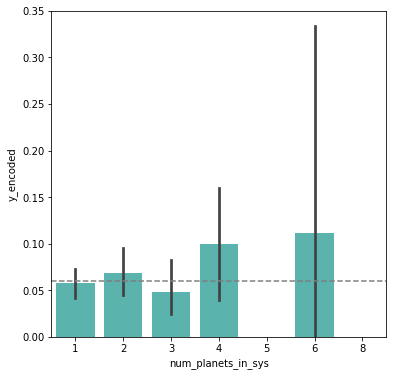

In [8]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'num_planets_in_sys', y = 'y_encoded', data=train, alpha=.8, color='lightseagreen')
plt.axhline(train['y_encoded'].mean(), ls='--', color='gray')
plt.show()

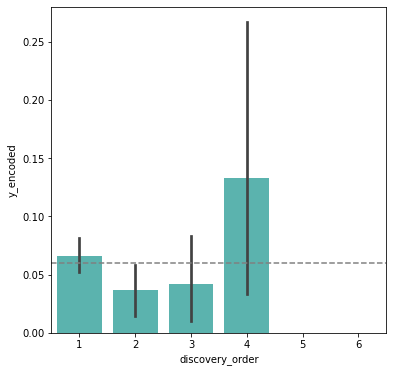

In [9]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'discovery_order', y = 'y_encoded', data=train, alpha=.8, color='lightseagreen')
plt.axhline(train['y_encoded'].mean(), ls='--', color='gray')
plt.show()

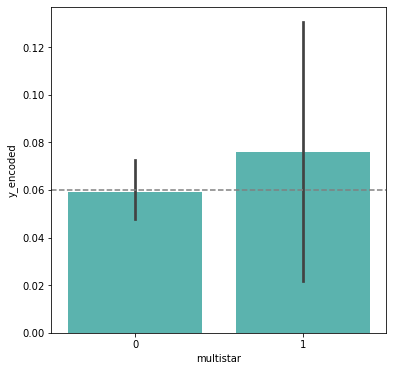

In [10]:
plt.figure(figsize=(6,6))
sns.barplot(x = 'multistar', y = 'y_encoded', data=train, alpha=.8, color='lightseagreen')
plt.axhline(train['y_encoded'].mean(), ls='--', color='gray')
plt.show()

In [11]:
features_to_chi_square_test = ['num_planets_in_sys','discovery_order','multistar']

In [12]:
for col in features_to_chi_square_test:
    print(col)
    observation = pd.crosstab(train['y_encoded'], train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observation)
    print(f'chi2 = {chi2}, p = {p}')
    if p < .05:
        print('We reject the null hypothesis.')
    else: 
        print('We fail to reject the null hypothesis.')
    print('\n-----\n')

num_planets_in_sys
chi2 = 7.191529879286361, p = 0.30349740065174396
We fail to reject the null hypothesis.

-----

discovery_order
chi2 = 7.395523006493354, p = 0.19284693143357282
We fail to reject the null hypothesis.

-----

multistar
chi2 = 0.1900250016722465, p = 0.6628958096594963
We fail to reject the null hypothesis.

-----



### Means testing - just need to see if they are different, not greater than or less (can use t value to see that) so two sided t-test!  Assumptions checked - variances especially!)

In [13]:
alpha = .05

In [16]:
features_to_means_test = ['orbital_period', 'star_temp', 'metallicity',
       'luminosity', 'star_age', 'star_mass', 'star_density',
       'star_radius', 'star_distance_from_earth', 'multistar']

In [17]:
for col in features_to_means_test:
    print(col)
    a = train[train.y == 'Earthlike']
    b = train[train.y == 'Not-Earthlike']
    print(f'Variances = {a[col].var()} and {b[col].var()}\n-----\n')

orbital_period
Variances = 77.74952019406574 and 102880.32334392206
-----

star_temp
Variances = 602896.15418166 and 487327.1240263083
-----

metallicity
Variances = 0.03250890583274165 and 0.03335081035506633
-----

luminosity
Variances = 0.3883272973521215 and 0.2647226892206346
-----

star_age
Variances = 8.14216652560035 and 8.593731691433984
-----

star_mass
Variances = 0.047892734462816416 and 0.06732420332351757
-----

star_density
Variances = 21.167465596149448 and 19.225135314626154
-----

star_radius
Variances = 0.09801971123203868 and 0.11125900308927855
-----

star_distance_from_earth
Variances = 113523.76042414342 and 225687.51941902816
-----

multistar
Variances = 0.0689809630459127 and 0.05403331194689865
-----



In [18]:
means_test_eq_variance = ['star_temp', 'metallicity',
       'luminosity', 'star_age', 'star_mass', 'star_density',
       'star_radius']
means_test_uneq_variances = ['orbital_period', 'star_distance_from_earth']

In [19]:
for col in means_test_eq_variance:
    print(col)
    a = train[train.y == 'Earthlike']
    b = train[train.y == 'Not-Earthlike']
    t, p = stats.ttest_ind(a[col], b[col], equal_var=True)
    print(f't = {t}, p = {p}')
    if p < alpha:
        print('We reject the null hypothesis.')
    else: print('We fail to reject the null hypothesis.')
    print('\n-----\n')
          
for col in means_test_uneq_variances:
    print(col)
    a = train[train.y == 'Earthlike']
    b = train[train.y == 'Not-Earthlike']
    t, p = stats.ttest_ind(a[col], b[col], equal_var=False)
    print(f't = {t}, p = {p}')
    if p < alpha:
        print('We reject the null hypothesis.')
    else: print('We fail to reject the null hypothesis.')  
    print('\n-----\n')

star_temp
t = -0.42025043497161074, p = 0.6743597673130222
We fail to reject the null hypothesis.

-----

metallicity
t = -4.172131292981905, p = 3.1820878661487445e-05
We reject the null hypothesis.

-----

luminosity
t = -0.009226481370219319, p = 0.9926396044038235
We fail to reject the null hypothesis.

-----

star_age
t = 0.42674002914749504, p = 0.6696269397901137
We fail to reject the null hypothesis.

-----

star_mass
t = -1.6009096815985606, p = 0.10959721279652657
We fail to reject the null hypothesis.

-----

star_density
t = 0.08339017323432389, p = 0.9335518853935204
We fail to reject the null hypothesis.

-----

star_radius
t = -0.8512569147323653, p = 0.3947558917901113
We fail to reject the null hypothesis.

-----

orbital_period
t = -5.48055345523373, p = 4.958937478954556e-08
We reject the null hypothesis.

-----

star_distance_from_earth
t = -3.893391130708789, p = 0.00016340530837453976
We reject the null hypothesis.

-----



## Clustering by single feature

In [ ]:
for col in X.columns:
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X[[col]]).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title(f'Change in inertia for {col} as k increases')

## Clustering by pairs

In [ ]:
from itertools import combinations

In [ ]:
combos = list(combinations(X.columns,2))
for i in combos:
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X[list(i)]).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title(f'Change in inertia for {i} as k increases')

# Graph and chi-square clusters to see if any can reject the null - that means they are helpful!!!

In [ ]:
train.info()

In [ ]:
X = train[['luminosity','star_temp']]
X

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train['lt_cluster'] = kmeans.predict(X)
train

In [ ]:
sns.scatterplot(data=train, x=(train.star_temp),y=(train.luminosity),hue='cluster')

In [ ]:
X2 = train[['luminosity','star_mass']]
X2

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X2)

train['cluster2'] = kmeans.predict(X2)
train

In [ ]:
sns.scatterplot(data=train, x=('star_mass'),y=('luminosity'),hue='cluster2')

In [ ]:
X3 = train[['luminosity','star_radius(vs_sun)','star_temp']]
X3

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X3)

train['cluster3'] = kmeans.predict(X3)

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(121)
plt.title('Temp v Lum including radius')
sns.scatterplot(data=train, x=('star_temp'),y=('luminosity'),hue='cluster3')
plt.subplot(122)
plt.title('Temp v Lum only')
sns.scatterplot(data=train, x=('star_temp'),y=('luminosity'),hue='cluster')
plt.show()

### Combine lum, temp into a cluster (lum captures radius and temp)
### Drop the cluster inputs (lum, temp) and mass and radius, but maintain density 

In [ ]:
train.info()
train.head(2)

In [ ]:
train = train.drop(columns=['luminosity','star_radius','star_temp','star_mass','star_distance_from_earth'])
train.info()
train.head(2)